# 00. Exploratory Data Analysis

Author: **Anna Toidze**


In this Jupyter Notebook download the data and preprocess the provided samples.

**Exercise overview:**<br>
[1. Setup](#setup)<br>
[2. Download](#download)<br>
[3.  Metadata EDA - Exploratory Data Analysis](#metadata)<br>
[4. Clustering - Operational Taxonomic Units](#clustering)<br>


<a id='setup'></a>

## 1. Setup

In [2]:
# importing all required packages & notebook extensions at the start of the notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# assigning variables throughout the notebook

# location of this week's data and all the results produced by this notebook
# - this should be a path relative to your working directory
raw_data_dir = "../data/raw"
data_dir = "../data/processed"
vis_dir  = "../results"

In [4]:
sns.set_style("white")
sns.set_theme(style="ticks", palette="pastel")


<a id='download'></a>

## 2. Download data

Donload the data from polybox.

Original data are stored in `<project-root>/data/raw` (please refrain from editting it!).

In [3]:
%%bash -s $raw_data_dir $data_dir $vis_dir

mkdir -p "$1" "$2" "$3"
chmod -R +rxw "$1" "$2" "$3"

In [4]:
# this will download the sequence data to <project-root>/data/raw/sequencs.qza
! aria2c --max-connection-per-server="$(nproc)" \
    --allow-overwrite=true \
    -d "$raw_data_dir" \
    "https://polybox.ethz.ch/index.php/s/lCmJYEDg5Xz1FEA/download"

zsh:1: command not found: nproc
Exception: [AbstractOptionHandler.cc:69] errorCode=28 We encountered a problem while processing the option '--max-connection-per-server'.
  -> [OptionHandlerImpl.cc:159] errorCode=1 Bad number 
Usage:
 -x, --max-connection-per-server=NUM The maximum number of connections to one
                              server for each download.

                              Possible Values: 1-16
                              Default: 1
                              Tags: #basic, #http, #ftp


In [5]:
# this will download the metadata to <project-root>/data/raw/metadata.tsv
! aria2c --max-connection-per-server="$(nproc)" \
    --allow-overwrite=true \
    -d "$raw_data_dir" \
    "https://polybox.ethz.ch/index.php/s/JrwER5E9kpgGuWd/download"

zsh:1: command not found: nproc
Exception: [AbstractOptionHandler.cc:69] errorCode=28 We encountered a problem while processing the option '--max-connection-per-server'.
  -> [OptionHandlerImpl.cc:159] errorCode=1 Bad number 
Usage:
 -x, --max-connection-per-server=NUM The maximum number of connections to one
                              server for each download.

                              Possible Values: 1-16
                              Default: 1
                              Tags: #basic, #http, #ftp


In [6]:
# peek at the data
! qiime tools peek $raw_data_dir/sequences.qza

UUID:        058d7a5b-dd47-427e-b047-e5563adaefee
Type:        SampleData[PairedEndSequencesWithQuality]
Data format: SingleLanePerSamplePairedEndFastqDirFmt


<a id='metadata'></a>

# 3. Metadata EDA - Exploratory Data Analysis

In [5]:
meta = pd.read_csv(f"{raw_data_dir}/metadata.tsv", sep="\t")
meta.head()

,Sample_Name,Patient_ID,Stool_Consistency,Patient_Sex,Sample_Day,Recovery_Day,Cohort_Number
0,EG2580,P042,liquid,F,13,17.0,2
1,EG2559,P043,liquid,M,15,17.0,2
2,EG2537,P042,liquid,F,0,17.0,1
3,EG2518,P043,liquid,M,0,17.0,1
4,EG2490,P030,formed,F,0,NaN,1


In [6]:
meta[meta.Cohort_Number == 2]

,Sample_Name,Patient_ID,Stool_Consistency,Patient_Sex,Sample_Day,Recovery_Day,Cohort_Number
0,EG2580,P042,liquid,F,13,17.0,2
1,EG2559,P043,liquid,M,15,17.0,2
5,EG2473,P055,semi-formed,M,20,22.0,2
8,EG2392,P005,semi-formed,M,22,24.0,2
9,EG2391,P050,liquid,F,23,24.0,2
13,EG2226,P074,liquid,F,23,21.0,2
17,EG2018,P014,semi-formed,F,14,16.0,2
18,EG1990,P018,semi-formed,F,20,15.0,2
20,EG1940,P071,liquid,M,27,29.0,2
21,EG0118,P062,formed,F,30,27.0,2


In [6]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sample_Name        102 non-null    object 
 1   Patient_ID         102 non-null    object 
 2   Stool_Consistency  102 non-null    object 
 3   Patient_Sex        102 non-null    object 
 4   Sample_Day         102 non-null    int64  
 5   Recovery_Day       99 non-null     float64
 6   Cohort_Number      102 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.7+ KB


In [7]:
meta.describe()

,Sample_Day,Recovery_Day,Cohort_Number
count,102.000000,99.000000,102.000000
mean,11.852941,26.232323,1.470588
std,15.078932,11.299113,0.501599
min,0.000000,7.000000,1.000000
25%,0.000000,20.000000,1.000000
50%,0.000000,24.000000,1.000000
75%,22.000000,28.500000,2.000000
max,70.000000,65.000000,2.000000


Checkign if there are any missing values in the metadata. 

In [10]:
meta.isnull().sum()

Sample_Name          0
Patient_ID           0
Stool_Consistency    0
Patient_Sex          0
Sample_Day           0
Recovery_Day         3
Cohort_Number        0
dtype: int64

That means we have 3 missing values in our metadata, namely 3 patients that have not recovered.

Number of patients from first cohort:

In [ ]:
len(meta[meta.Cohort_Number == 1])

54

Number of patients from second cohort:

In [ ]:
len(meta[meta.Cohort_Number == 2])

48

Number of patients with two samples:

In [13]:
(meta.Patient_ID.value_counts() == 2).sum()

35

In [18]:
meta.Patient_ID.value_counts() == 2

Patient_ID
P042     True
P004     True
P020     True
P019     True
P002     True
        ...  
P075    False
P018    False
P001    False
P024    False
P021    False
Name: count, Length: 67, dtype: bool

Text(0, 0.5, 'Count')

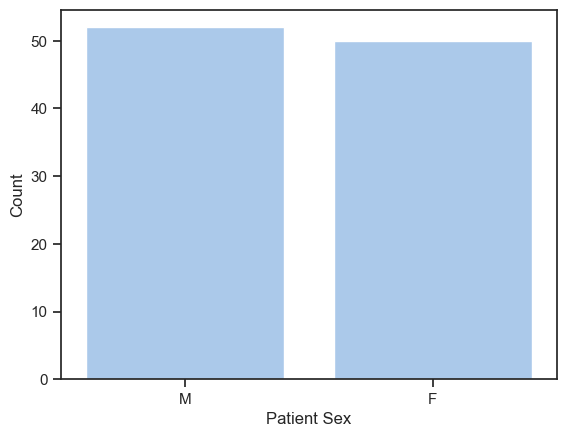

In [27]:
sns.barplot(meta.Patient_Sex.value_counts())
plt.xlabel("Patient Sex")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

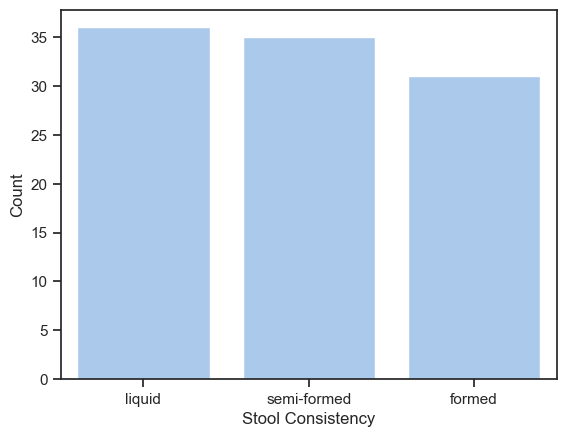

In [26]:
sns.barplot(meta.Stool_Consistency.value_counts())
plt.xlabel("Stool Consistency")
plt.ylabel("Count")


### Correlation between numerical variables

We'll use the `corr()` function from pandas to calculate the correlation matrix and then use `sns.heatmap()` to visualize the correlation coefficients. The `annot=True` argument in `sns.heatmap()` will display the correlation coefficients in each cell.



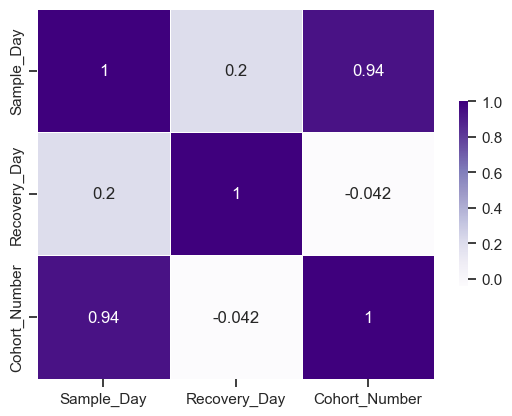

In [7]:
meta_num = meta.select_dtypes(include='number')
sns.heatmap(meta_num.corr(method='spearman'), linewidths=0.5, cbar_kws={"shrink": 0.5}, cmap='Purples', annot=True);


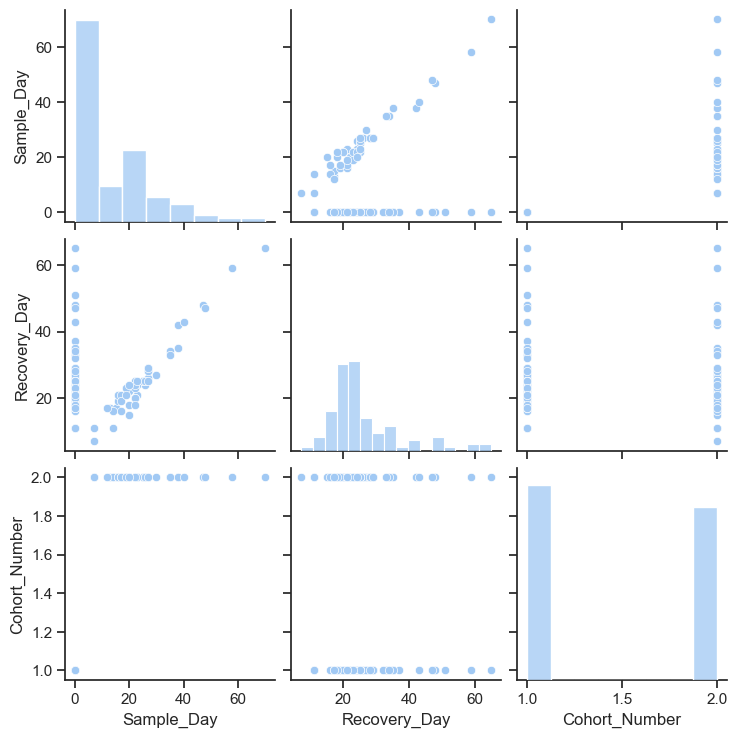

In [18]:
# Pairplot is an alternative way to see if there is correlation
sns.pairplot(meta_num);

In [8]:
# Calculate the correlation
correlation, _ = stats.spearmanr(meta[meta.Cohort_Number == 2].Sample_Day, meta[meta.Cohort_Number == 2].Recovery_Day)

print(f'The correlation between sample_day and recovery_day is: {round(correlation, 2)}')

The correlation between sample_day and recovery_day is: 0.94


There is correlation between sample day and recovery day, and between the sample day and cohort number. 

### Looking at distributions of numerical variables

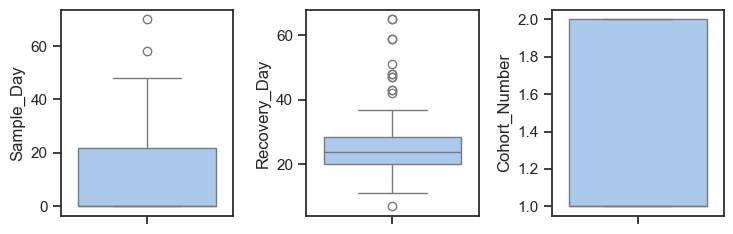

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5))

for i, el in enumerate(list(meta_num.columns.values)):
    sns.boxplot(meta_num, y=meta_num[el], ax=axes.flatten()[i], vert=True)
    # meta_num.boxplot(el, ax=axes.flatten()[i], vert=False)

plt.tight_layout()
plt.show()

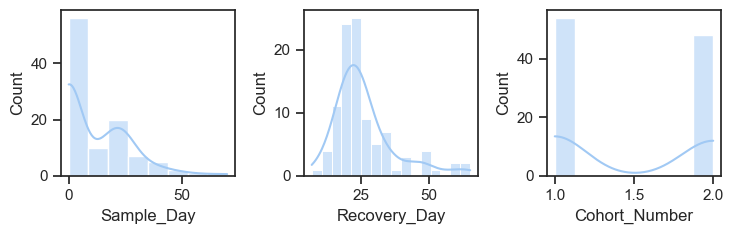

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5))

for i, el in enumerate(list(meta_num.columns.values)):
    sns.histplot(meta_num, x=meta_num[el], ax=axes.flatten()[i], kde=True)
    # meta_num.boxplot(el, ax=axes.flatten()[i], vert=False)

plt.tight_layout()
plt.show()

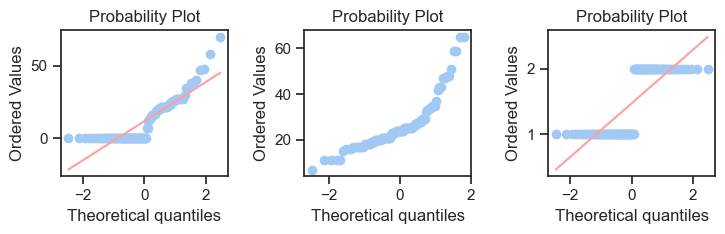

In [23]:
# QQ-plot for normality check

fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5))

for i, el in enumerate(list(meta_num.columns.values)):
    stats.probplot(meta[el], dist="norm", plot=axes[i])
    # meta_num.boxplot(el, ax=axes.flatten()[i], vert=False)

plt.tight_layout()
plt.show()

# --> not normally distirbuted

**None of the variables are normally distributed.**

## S1 Question

**Do you find any associations within your metadata (e.g. between stool
consistency and sample day)?**

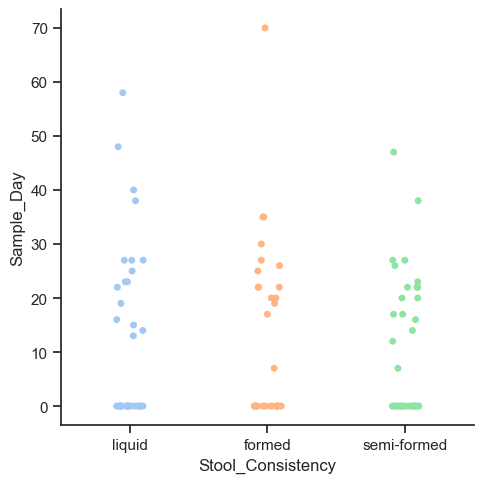

In [ ]:
sns.catplot(data=meta, x="Stool_Consistency", y="Sample_Day", hue="Stool_Consistency");

#### Stool consistency and sample day

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


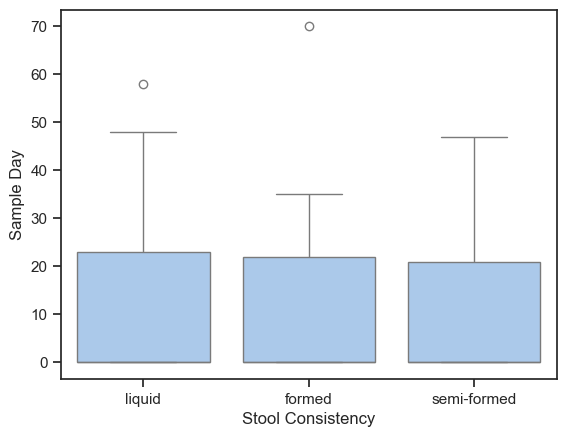

In [ ]:
sns.boxplot(data=meta, x="Stool_Consistency", y="Sample_Day")
# plt.yticks(["Liquid", "Formed", "Semi-formed"])
plt.xlabel("Stool Consistency")
plt.ylabel("Sample Day")
plt.legend(frameon=False);

No significant correlation between stool consistency and sample day.

Maybe segregation based on sex will tell us something interesting?


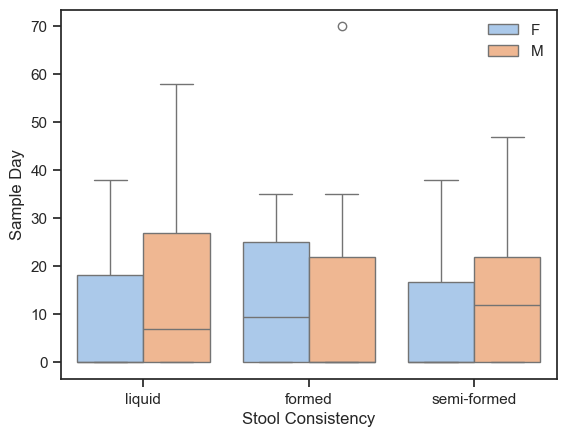

In [ ]:
sns.boxplot(data=meta, x="Stool_Consistency", y="Sample_Day", hue="Patient_Sex")
# plt.yticks(["Liquid", "Formed", "Semi-formed"])
plt.xlabel("Stool Consistency")
plt.ylabel("Sample Day")
plt.legend(frameon=False);

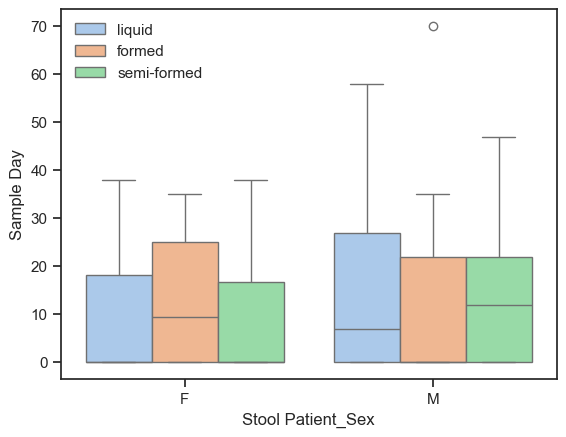

In [ ]:
sns.boxplot(data=meta, x="Patient_Sex", y="Sample_Day", hue="Stool_Consistency")
# plt.yticks(["Liquid", "Formed", "Semi-formed"])
plt.xlabel("Stool Patient_Sex")
plt.ylabel("Sample Day")
plt.legend(frameon=False);

### Non-parametric tests

The Mann-Whitney U test was used to assess associations between patient sex and stool consistency, while the Kruskal-Wallis test was applied to evaluate the association between sample day and stool consistency. 

Mann-Whitney U is non-parametric version of t-test, to compare two independent groups to determine if their distributions differ.

Kruskal-Wallis test is also non-parametric, but compares three or more independent groups to determine if at least one group differs significantly from others and is extension of Mann-Whitney test.

In [ ]:
# Kruskal-Wallis test for non-normal data
kruskal_result = stats.kruskal(
    meta[meta["Stool_Consistency"] == "liquid"]["Sample_Day"],
    meta[meta["Stool_Consistency"] == "formed"]["Sample_Day"],
    meta[meta["Stool_Consistency"] == "semi-formed"]["Sample_Day"]
)

print("Kruskal-Wallis result:", kruskal_result)

Kruskal-Wallis result: KruskalResult(statistic=0.12554581363358241, pvalue=0.9391567255645336)


In [17]:
# Mann-Whitney U Test for non-normal data
mannwhitney_result = stats.mannwhitneyu(
    meta[meta["Patient_Sex"] == "F"]["Stool_Consistency"],
    meta[meta["Patient_Sex"] == "M"]["Stool_Consistency"]
)
print("Mann-Whitney U result:", mannwhitney_result)


Mann-Whitney U result: MannwhitneyuResult(statistic=1176.5, pvalue=0.37210387939698675)


As based on statistical tests, there is no significant association between sample day and the three stool consistency levels. Also there is no significant difference between female and male stool consistency levels.